<a href="https://colab.research.google.com/github/FangfangChen2023/ML-Projects/blob/main/CatOrDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# tf.keras.utils.image_dataset_from_directory??

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory("/content/sample_data/train")

data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

Found 1202 files belonging to 3 classes.


In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 1], dtype=int32)

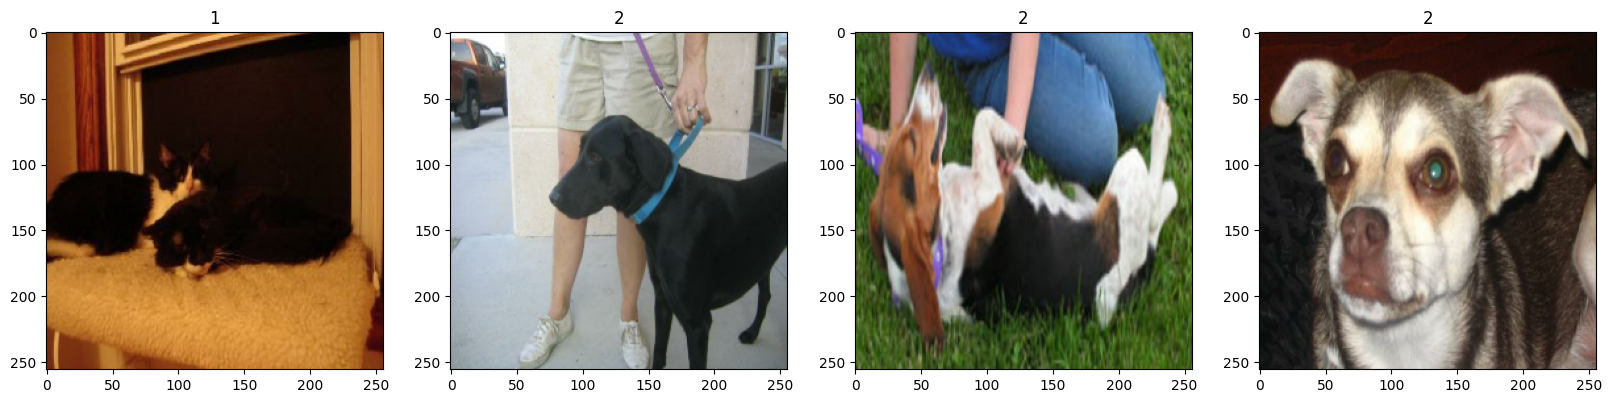

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
train_data = train_data.map(lambda x,y: (x/255.0, y//2))

In [ ]:
scaled_iterator = train_data.as_numpy_iterator()
batch = scaled_iterator.next()
# batch[0]

In [ ]:
# batch[1]

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

In [ ]:
train_size = int(len(train_data)*.7)
val_size = int(len(train_data)*.3)
val_size

11

In [ ]:
train = train_data.take(train_size)
val = train_data.skip(train_size).take(val_size)
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
def build_model(hp):
  model = models.Sequential()

  model.add(layers.Conv2D(
        filters=hp.Int('conv_0_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_0_kernel', values = [3,5]),
        activation='relu',
        input_shape=(256,256,3)
    ))
  # model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  for i in range(hp.Int("num_layers", 1, 4)):
    model.add(layers.Conv2D(
        filters=hp.Int('conv_'+str(i)+'_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_'+str(i)+'_kernel', values = [3,5]),
        activation='relu'
    ))
    # model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

  # model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.6, step=0.1)))

  model.add(layers.Flatten())
  model.add(layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ))

  # model.add(layers.BatchNormalization())
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=30,directory='output',project_name="Cat or Dog")

In [ ]:
tuner_search.search(train, epochs=5, validation_data=val)

Trial 30 Complete [00h 00m 48s]
val_accuracy: 0.6160714030265808

Best val_accuracy So Far: 0.8258928656578064
Total elapsed time: 00h 20m 14s


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 208)               2

In [ ]:
tuner_search.results_summary()

Results summary
Results in output/Cat or Dog
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
conv_0_filter: 32
conv_0_kernel: 3
num_layers: 1
dense_1_units: 208
learning_rate: 0.001
conv_1_filter: 48
conv_1_kernel: 5
conv_2_filter: 112
conv_2_kernel: 3
conv_3_filter: 128
conv_3_kernel: 5
Score: 0.8258928656578064

Trial 26 summary
Hyperparameters:
conv_0_filter: 80
conv_0_kernel: 3
num_layers: 2
dense_1_units: 208
learning_rate: 0.0001
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 3
conv_3_filter: 64
conv_3_kernel: 5
Score: 0.7276785969734192

Trial 02 summary
Hyperparameters:
conv_0_filter: 96
conv_0_kernel: 3
num_layers: 3
dense_1_units: 192
learning_rate: 0.0001
conv_1_filter: 32
conv_1_kernel: 5
conv_2_filter: 112
conv_2_kernel: 3
conv_3_filter: 112
conv_3_kernel: 5
Score: 0.7142857313156128

Trial 21 summary
Hyperparameters:
conv_0_filter: 48
conv_0_kernel: 5
num_layers: 2
dense_1_units: 128
learning_r

In [ ]:
hist = model.fit(train, epochs=10,
                    validation_data=val)

val_acc_per_epoch = hist.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
10/10 [==============================] - 8s 424ms/step - loss: 0.4005 - accuracy: 0.8313 - val_loss: 0.3747 - val_accuracy: 0.8527
Epoch 2/10
10/10 [==============================] - 4s 371ms/step - loss: 0.2978 - accuracy: 0.9062 - val_loss: 0.3362 - val_accuracy: 0.8839
Epoch 3/10
10/10 [==============================] - 7s 698ms/step - loss: 0.2010 - accuracy: 0.9344 - val_loss: 0.2469 - val_accuracy: 0.9196
Epoch 4/10
10/10 [==============================] - 9s 674ms/step - loss: 0.2745 - accuracy: 0.8750 - val_loss: 0.3168 - val_accuracy: 0.9286
Epoch 5/10
10/10 [==============================] - 7s 362ms/step - loss: 0.2712 - accuracy: 0.9250 - val_loss: 0.3702 - val_accuracy: 0.7991
Epoch 6/10
10/10 [==============================] - 7s 685ms/step - loss: 0.1674 - accuracy: 0.9469 - val_loss: 0.1920 - val_accuracy: 0.9420
Epoch 7/10
10/10 [==============================] - 5s 367ms/step - loss: 0.1126 - accuracy: 0.9750 - val_loss: 0.1500 - val_accuracy: 0.9420
Epoch 

In [ ]:
hist = model.fit(train, epochs=10,
                    validation_data=val, batch_size=128)

Epoch 1/8
10/10 [==============================] - 7s 445ms/step - loss: 0.3913 - accuracy: 0.8406 - val_loss: 0.3532 - val_accuracy: 0.8750
Epoch 2/8
10/10 [==============================] - 5s 374ms/step - loss: 0.3352 - accuracy: 0.8594 - val_loss: 0.3191 - val_accuracy: 0.8973
Epoch 3/8
10/10 [==============================] - 6s 489ms/step - loss: 0.2406 - accuracy: 0.9312 - val_loss: 0.3210 - val_accuracy: 0.8661
Epoch 4/8
10/10 [==============================] - 5s 370ms/step - loss: 0.1564 - accuracy: 0.9750 - val_loss: 0.2137 - val_accuracy: 0.9420
Epoch 5/8
10/10 [==============================] - 5s 372ms/step - loss: 0.1298 - accuracy: 0.9750 - val_loss: 0.1653 - val_accuracy: 0.9375
Epoch 6/8
10/10 [==============================] - 5s 377ms/step - loss: 0.0960 - accuracy: 0.9688 - val_loss: 0.1681 - val_accuracy: 0.9509
Epoch 7/8
10/10 [==============================] - 5s 373ms/step - loss: 0.0905 - accuracy: 0.9812 - val_loss: 0.1252 - val_accuracy: 0.9643
Epoch 8/8
10/

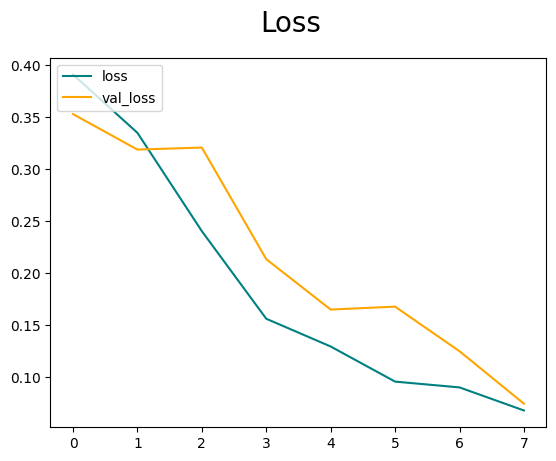

In [ ]:
#visualize performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.8))

model.add(layers.Flatten())
model.add(layers.Dense(208, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train, epochs=30, validation_data=val, callbacks=[callback], batch_size=64)

Epoch 1/30
26/26 [==============================] - 8s 206ms/step - loss: 1.7377 - accuracy: 0.4688 - val_loss: 0.6915 - val_accuracy: 0.5341
Epoch 2/30
26/26 [==============================] - 5s 167ms/step - loss: 0.6889 - accuracy: 0.5096 - val_loss: 0.6917 - val_accuracy: 0.5739
Epoch 3/30
26/26 [==============================] - 5s 187ms/step - loss: 0.6837 - accuracy: 0.5373 - val_loss: 0.6870 - val_accuracy: 0.5597
Epoch 4/30
26/26 [==============================] - 5s 170ms/step - loss: 0.6711 - accuracy: 0.5877 - val_loss: 0.6963 - val_accuracy: 0.4915
Epoch 5/30
26/26 [==============================] - 5s 165ms/step - loss: 0.6753 - accuracy: 0.5637 - val_loss: 0.6804 - val_accuracy: 0.5710
Epoch 6/30
26/26 [==============================] - 5s 197ms/step - loss: 0.6400 - accuracy: 0.6202 - val_loss: 0.6548 - val_accuracy: 0.6193
Epoch 7/30
26/26 [==============================] - 5s 168ms/step - loss: 0.6340 - accuracy: 0.6334 - val_loss: 0.6566 - val_accuracy: 0.6676
Epoch 

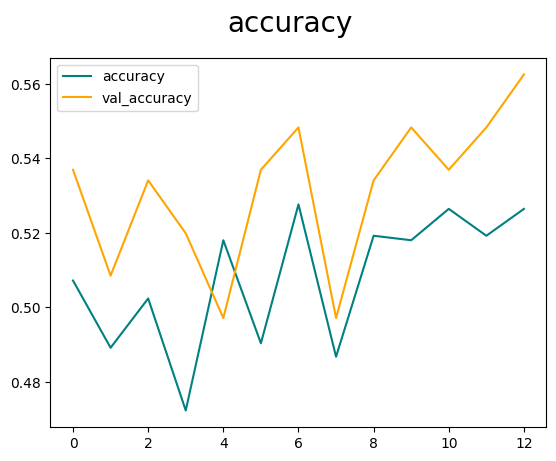

In [ ]:
#visualize performance
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

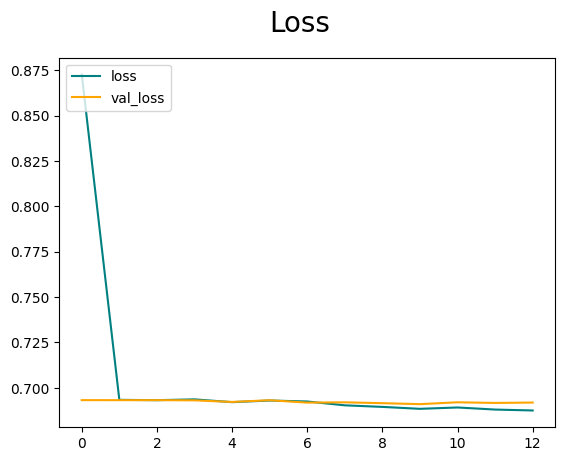

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Found 140 files belonging to 3 classes.


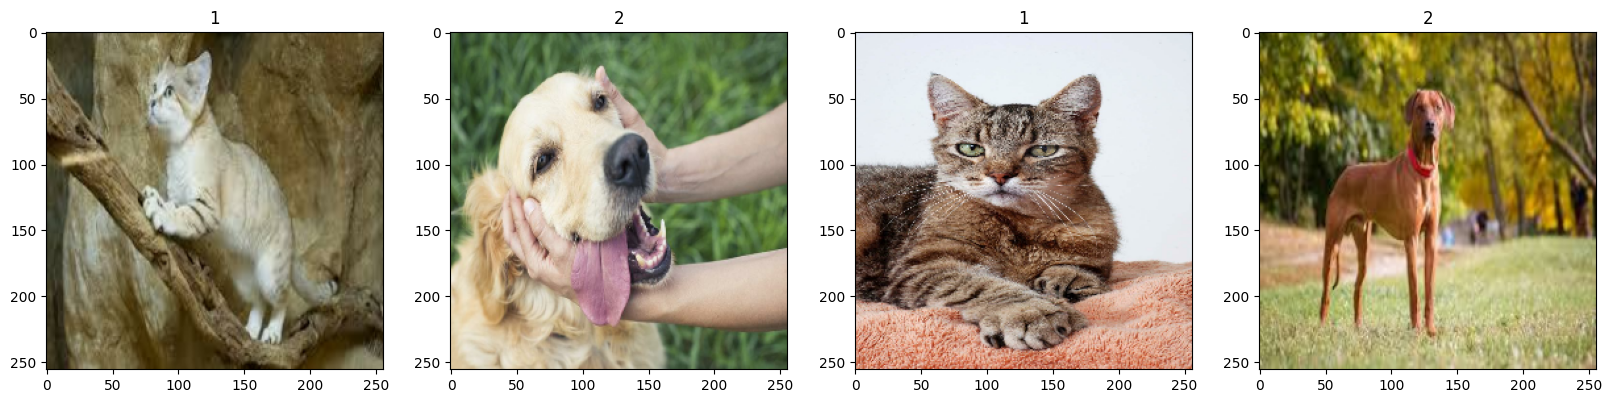

In [ ]:
# testing data
test_data = tf.keras.utils.image_dataset_from_directory("/content/sample_data/test")
test_iterator = test_data.as_numpy_iterator()
test_batch = test_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(test_batch[1][idx])

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [ ]:
test_data = test_data.map(lambda x,y: (x/255.0, y//2))

x_test = np.concatenate(list(test_data.map(lambda x, y: x)))
y_test = np.concatenate(list(test_data.map(lambda x, y: y)))

In [ ]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

In [ ]:
# for scaled_test_batch in test_data.as_numpy_iterator():
#     X, y = scaled_test_batch
yhat = model.predict(x_test)

threshold = 0.5
binary_y_pred = (yhat > threshold).astype(int)

pre.update_state(y_test, binary_y_pred)
re.update_state(y_test, binary_y_pred)
acc.update_state(y_test, binary_y_pred)

5/5 [==============================] - 4s 663ms/step


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=140.0>

In [ ]:
binary_y_pred

In [ ]:
print("Precision"+str(pre.result()))
print("Recall" + str(re.result()))
print("BinaryAccuracy" + str(acc.result()))

Precisiontf.Tensor(0.5538462, shape=(), dtype=float32)
Recalltf.Tensor(0.51428574, shape=(), dtype=float32)
BinaryAccuracytf.Tensor(0.55, shape=(), dtype=float32)


In [ ]:
conf_max = confusion_matrix(y_test, binary_y_pred)
tn, fp, fn, tp = conf_max.ravel()


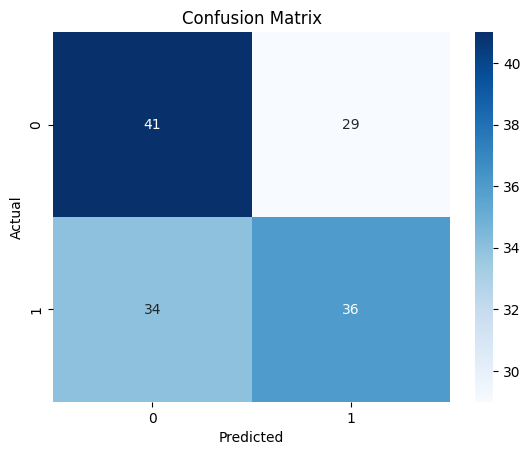

In [ ]:
sns.heatmap(conf_max, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# for scaled_test_batch in test_data.as_numpy_iterator():
#     X, y = scaled_test_batch
#     test_loss, test_acc = model.evaluate(X, y)

1/1 [==============================] - 0s 36ms/step - loss: 1.0594 - accuracy: 0.5833
